# **House Price Prediction**

## Introduction

This project is about building a machine learning (ML) model that is capable of predicting the house price with just the total area of the house alone. In order to do such, these are the following questions that must be answered:

1. Are there any features with missing or inconsistent data?
2. What is the distribution of house prices?
3. How does price correlate with other numerical features like area, bedrooms, or parking?
4. Are transformations (e.g., log-transformation) needed for skewed numerical features?
5. How well does the model fit the training data? (Check R² and adjusted R²)
6. Does the model perform well on the test data, or is there overfitting/underfitting?
7. What is the conclusion?

## Package/Module Imports

This project will make use of the following modules and packages:

- `pandas` - for data wrangling and data analysis
- `matplotlib` & `seaborn` - for visualising data
- `numpy` - for transforming skewed variables
- `scikit-learn` - for building a machine learning model to predict house price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error as RMSE


house_price_data = pd.read_csv('../data/housing.csv')
house_price_data_copy = house_price_data.copy()

house_price_data_copy.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Overview

In order to create the model, the data must first be inspected -- data types of each column, its dimensions, number of missing values, etc..

---

In [2]:
house_price_data_copy.shape

(545, 13)

The dataset has a dimension of 545 observations (rows), each with 13 different types of data -- 13 columns.

In [3]:
house_price_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


According to the results, all 13 columns have 545 values that are not null values.

In [4]:
house_price_data_copy.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

The dataset contains mainly has columns with either integer values or object (string) values.

In [5]:
house_price_data_copy.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There are no missing values in the dataset, which is good.

In [6]:
house_price_data_copy.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Based on the summary statistics above, both the `price` and `area` columns seems to have a right-skewed distribution as their mean values are slightly greater than their median values. However, visualising the data may give evident conclusion on the skewness of the columns.

---

## Exploratory Data Analysis

As mentioned before, visualising the data may give evident conclusion on the skewness of the columns.

### Histograms

#### `price`

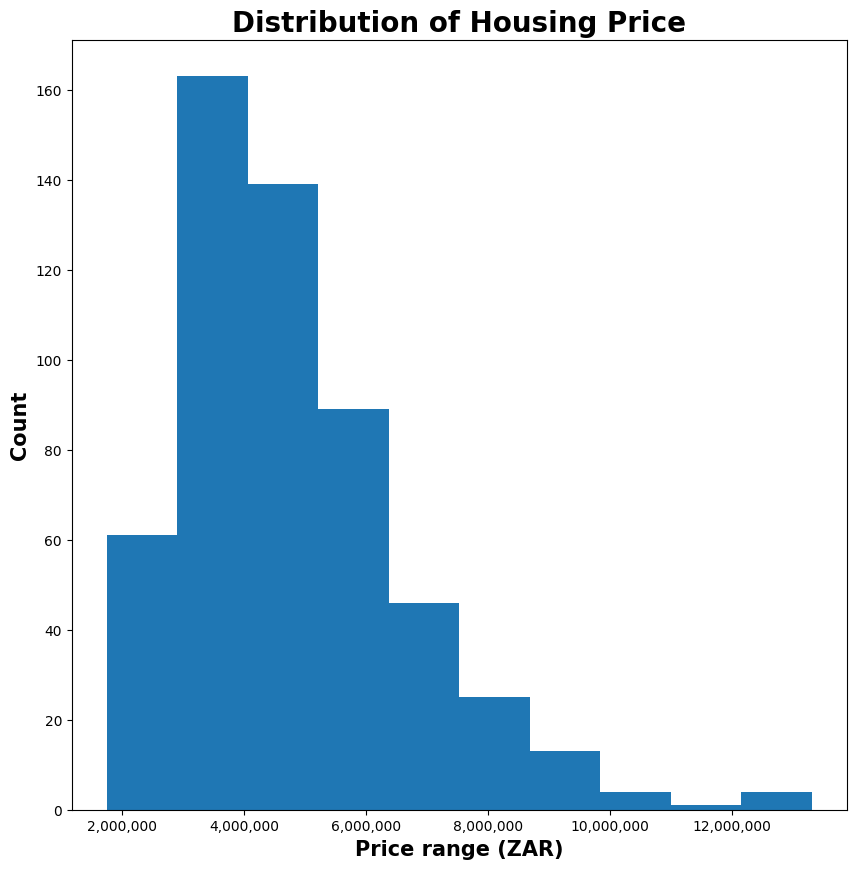

In [7]:
plt.figure(figsize=(10, 10))

plt.hist(house_price_data_copy.price)

plt.xlabel('Price range (ZAR)', weight='bold', fontsize=15)
plt.ylabel('Count', weight='bold', fontsize=15)
plt.title('Distribution of Housing Price', weight='bold', fontsize=20)

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.show()


Based on the histogram plot above, the distribution of the housing price is positively skewed -- majority of the observations (houses) are worth at 3 000 000-4 000 000 South African Rands (ZAR) or above.

#### `area`

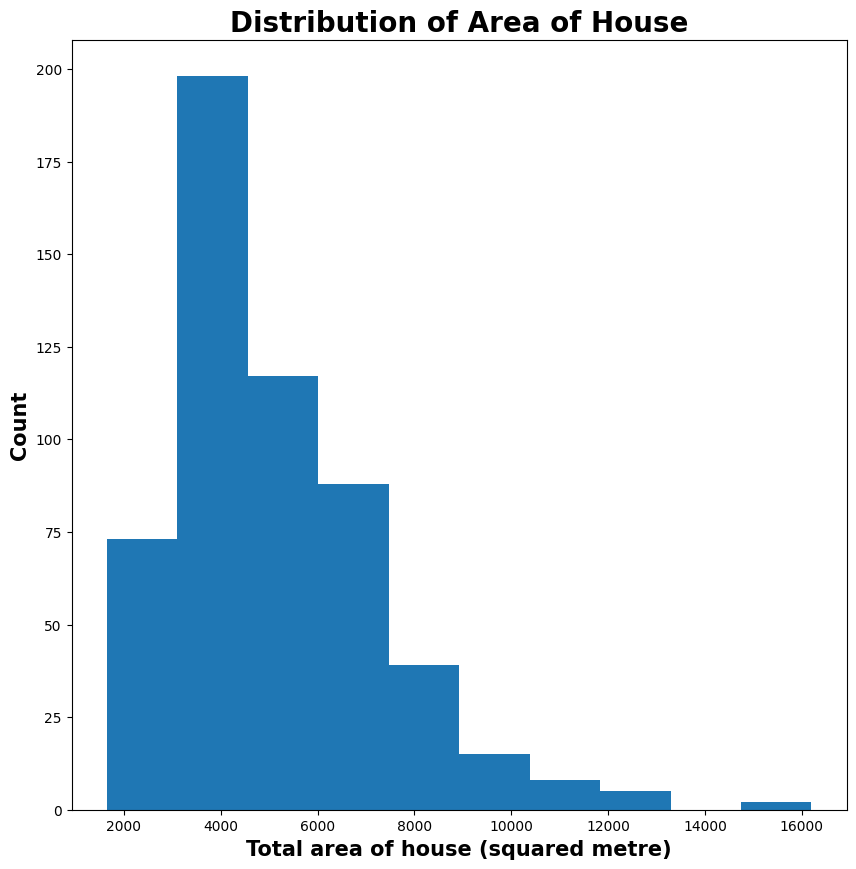

In [8]:
plt.figure(figsize=(10, 10))

plt.hist(house_price_data_copy.area)

plt.xlabel('Total area of house (squared metre)', weight='bold', fontsize=15)
plt.ylabel('Count', weight='bold', fontsize=15)
plt.title('Distribution of Area of House', weight='bold', fontsize=20)

plt.show()

The histogram above is right-skewed -- majority of the observation's total area of the house is 4000 squared metre or above.

### Relationship between `price` and `area`

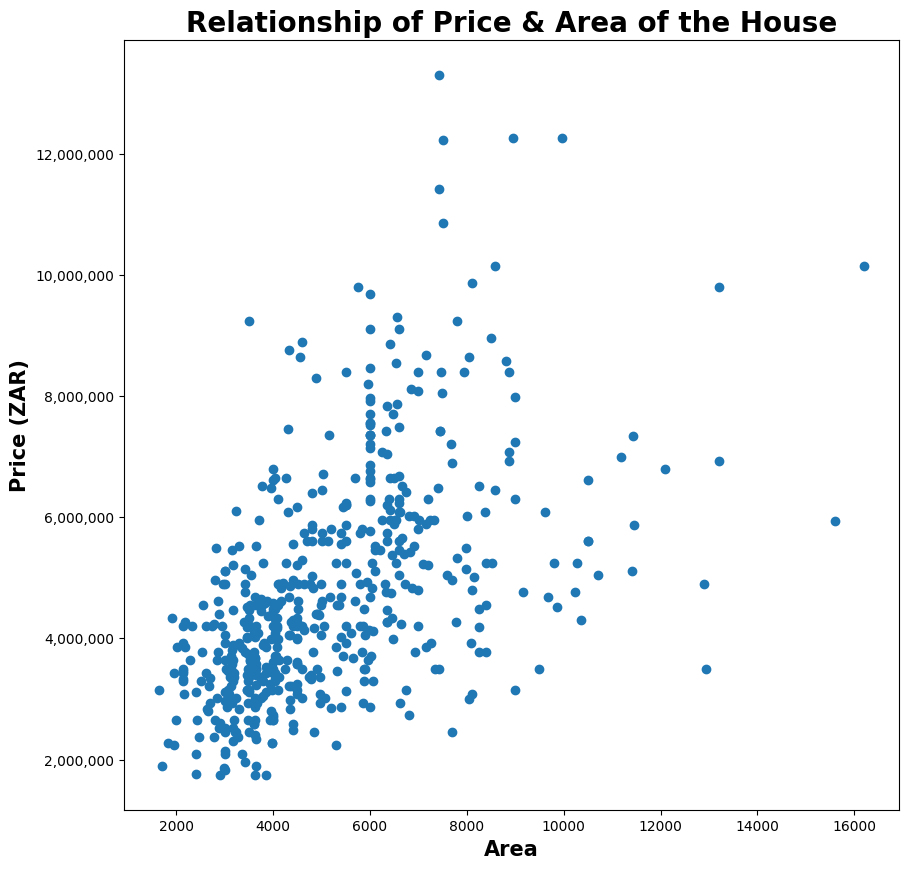

In [9]:
plt.figure(figsize=(10, 10))

plt.scatter(x=house_price_data_copy.area, y=house_price_data_copy.price)

plt.xlabel('Area', weight='bold', fontsize=15)
plt.ylabel('Price (ZAR)', weight='bold', fontsize=15)
plt.title('Relationship of Price & Area of the House', weight='bold', fontsize=20)

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))

plt.show()

The scatterplot reveals a positive relationship between the `price` and `area` variables. However, there seems to be a cluster of datapoints around the 4 000 squared metre - 4 000 000 ZAR mark.

### Heatmap

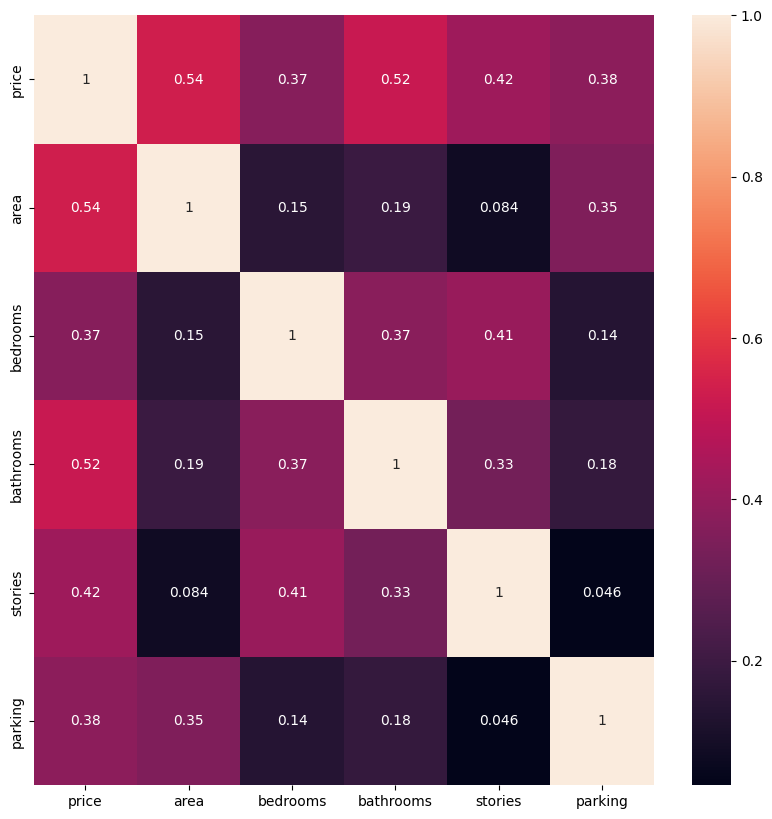

In [10]:
plt.figure(figsize=(10, 10))

subset_data = house_price_data_copy[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
correlation_matrix = subset_data.corr()

sns.heatmap(
    data=correlation_matrix,
    annot=True
    )

plt.show()

Based on the heatmap, both `area` and `bathrooms` have a moderately positive relationship with `price`. However, the relationship between `price` and `area` is slightly stronger.

Based on the histograms, scatterplot and heatmap above, it is clear that the variables' distributions are right-skewed, the correlation between `price` and `area` is moderately positive with clusters of datapoints around the 4 000 m^2-4 000 000 ZAR, and both `area` and `bathrooms` have a moderately positive relationship with `price`. Therefore, transforming the variables is necessary.

## Data Transformation

The `price` and `area` variables are very skewed. To deal with this skewness, log-transformation is a valid approach.

In [11]:
house_price_data_copy['log_price'] = np.log(house_price_data_copy.price)
house_price_data_copy['log_area'] = np.log(house_price_data_copy.area)

house_price_data_copy.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price,log_area
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275,8.911934
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321036,9.100526
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321036,9.206332
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175,8.922658
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001,8.911934


Now that the `price` and `area` variables are log-transformed, the next thing to do is to extract the log-transformed variables, split them, and use them to build and predict a simple linear regression model that uses the area of each house to predict the price.

In [12]:
X = house_price_data_copy['log_area'].values.reshape(-1, 1)
y = house_price_data_copy['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

To see if the model fits the training data, the independent variable from the training data -- `log_area` -- will be used to predict the dependent variable -- `log_price`, and the predicted dependent variable will be used with the actual dependent variable from the training data to determine the R-squared value.

In [13]:
linear_model.score(X_train, y_train)

0.33544119493269575

Based on the result above, the r-squared value is very low -- R-squared < .5. This suggests that the model is a poor fit for the training data. Now, the next thing to do is to confirm whether the model is overfitted/underfitted.

In [14]:
log_y_train_predict = linear_model.predict(X_train)
log_y_test_predict = linear_model.predict(X_test)

y_train_predict = np.exp(log_y_train_predict)
y_test_predict = np.exp(log_y_test_predict)

train_rmse = RMSE(np.exp(y_train), y_train_predict)
test_rmse = RMSE(np.exp(y_test), y_test_predict)

train_rmse, test_rmse, abs(train_rmse - test_rmse)

(1473897.2512575234, 1940274.9980393678, 466377.7467818444)

Based on the results above, the RMSE of training data is lower than the RMSE of the test data, indicating that the model preforms better with the training data. Also, the difference in RMSE is above 460 000, which is quite significant. When coupled with the R-squared value, it is likely that the model is overfitted. Thus, the model is definitely not a good fit for predicting the house prices.

---

## Conclusion

A linear regression model has been built to predict the price of a house using the area of the house. Unfortunately, the model is not good enough to predict the price of an individual house with just the area of the house, despite the fact that the relationship between the two variables is moderately positive.

### Recommendations

To be able to accurately predict the housing price of each observation, one can try any of the following recommendations: 

- Include another variable to increase the predictive power of the model.
- Utilise a more complex predicting algorithm.